In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


# Import data

In [2]:
data=pd.read_csv('pizza_v2.csv')

# 1.Display Top 5 Rows of the dataset


In [3]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


# 2.Cheack Last 5 rows of data set

In [4]:
data.tail()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


# 3.Find Shape of our dataset(Number of Rows and Number of Columns)

In [6]:
data.shape

(129, 9)

In [8]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 129
Number of Columns 9


# 4.Get Information About Our Dataset Like Total Number Rows, total Number of Columns, DataTypes of each Columns , DataTypes of Each Columns And Memory Requirement.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# 5. Check Null Values In The dataset

In [11]:
data.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

# 6.Get Overall Statistics About The Dataset

In [12]:
data.describe()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129,129,129,129,129,129,129,129,129
unique,5,43,12,12,20,6,2,2,2
top,C,"Rp72,000",12 inch,chicken,classic,medium,yes,yes,yes
freq,30,11,49,29,30,41,76,86,72


# 7. Data Preprocssing

In [13]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [14]:
data.rename({'price_rupiah':'price'},axis=1,inplace=True)

In [18]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [20]:
data['price']=data['price'].str.replace("Rp","")
data['price']=data['price'].str.replace(",","").astype('int32')

In [22]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,198000,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    int32 
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: int32(1), object(8)
memory usage: 8.7+ KB


In [25]:
def convert(value):
    return value*0.0054

In [26]:
data['price']=data['price'].apply(convert)

In [27]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [28]:
data['diameter']=data['diameter'].str.replace("inch","")
data['diameter']=data['diameter'].str.replace(" ","").astype('float32')

In [29]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Data Analysis

# 8. Univariate Analysis

In [32]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

# Company

In [33]:
data['company'].value_counts()

company
C    30
E    30
A    25
B    24
D    20
Name: count, dtype: int64

# Price

In [34]:
import matplotlib.pyplot as plt

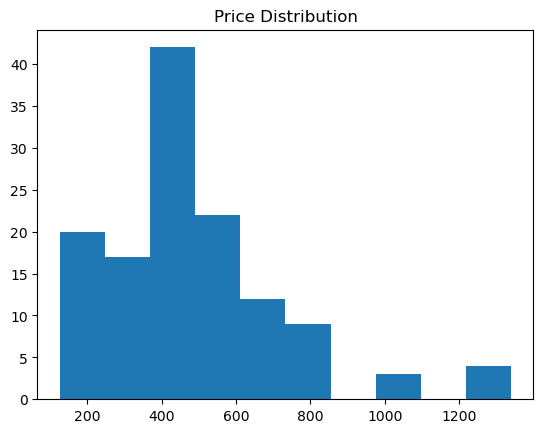

In [35]:
plt.hist(x="price",data=data)
plt.title("Price Distribution")
plt.show()

# Diameter

In [37]:
data['diameter'].value_counts()

diameter
12.0    49
14.0    24
8.5     22
17.0    10
18.5     6
16.0     5
8.0      4
16.5     4
22.0     3
20.0     1
18.0     1
Name: count, dtype: int64

In [38]:
import seaborn as sns

<Axes: xlabel='diameter', ylabel='count'>

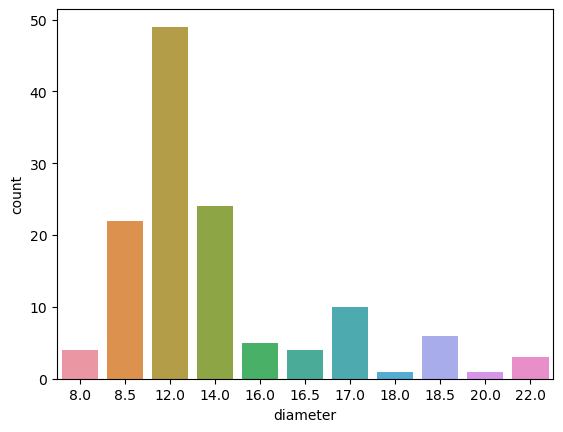

In [42]:
sns.countplot(x='diameter',data=data)

# Topping

In [43]:
data['topping'].value_counts()

topping
chicken         29
mushrooms       22
mozzarella      21
smoked_beef     19
tuna             9
vegetables       9
meat             8
black_papper     3
sausage          3
beef             3
papperoni        2
onion            1
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='topping'>

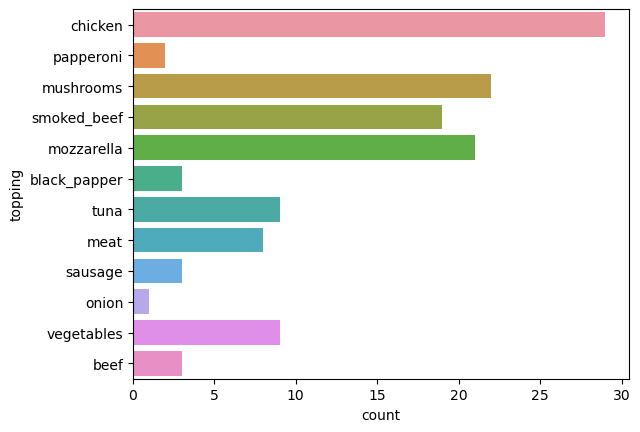

In [50]:
sns.countplot(y='topping',data=data)

# Variant

In [51]:
data['variant'].value_counts()

variant
classic              30
meat_lovers          10
double_mix           10
crunchy              10
new_york             10
double_decker         9
double_signature      5
american_favorite     5
BBQ_meat_fiesta       5
super_supreme         5
spicy_tuna            3
BBQ_sausage           3
extravaganza          3
meat_eater            3
gournet_greek         3
italian_veggie        3
thai_veggie           3
american_classic      3
neptune_tuna          3
spicy tuna            3
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='variant'>

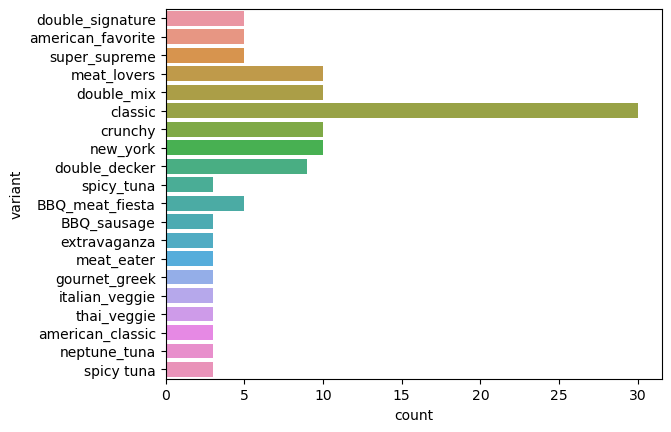

In [54]:
sns.countplot(y='variant',data=data)

# Size

In [55]:
data['size'].value_counts()

size
medium     41
small      22
large      21
reguler    20
jumbo      15
XL         10
Name: count, dtype: int64

<Axes: xlabel='size', ylabel='count'>

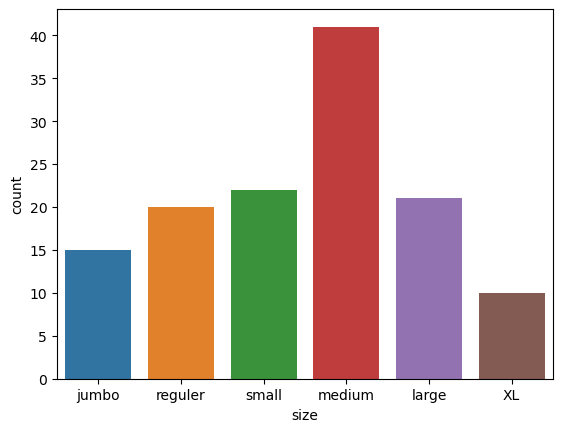

In [57]:
sns.countplot(x='size',data=data)

# Extra_sauce

<Axes: xlabel='count', ylabel='extra_sauce'>

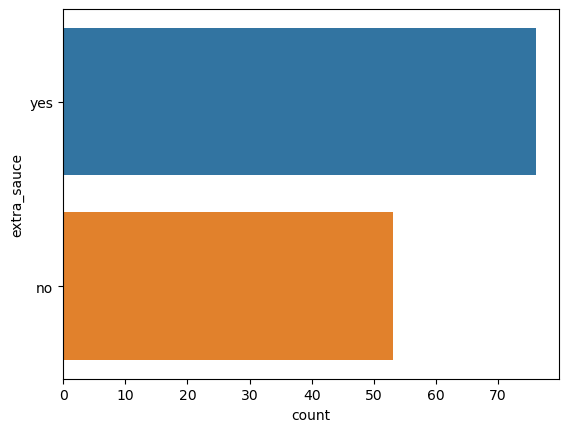

In [58]:
sns.countplot(x='extra_sauce',data=data)

# Extra_cheese

<Axes: xlabel='extra_cheese', ylabel='count'>

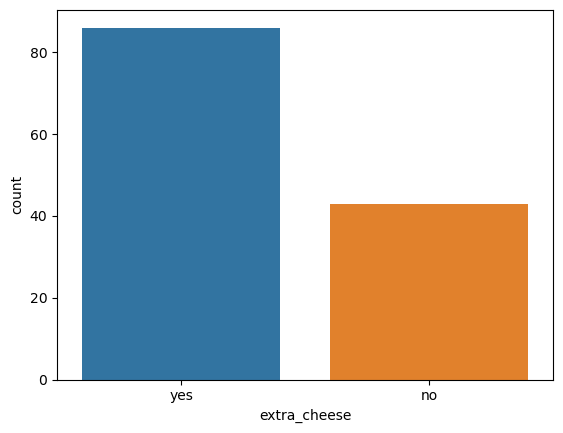

In [60]:
sns.countplot(x='extra_cheese',data=data)

# Extra_mushrooms

<Axes: xlabel='extra_mushrooms', ylabel='count'>

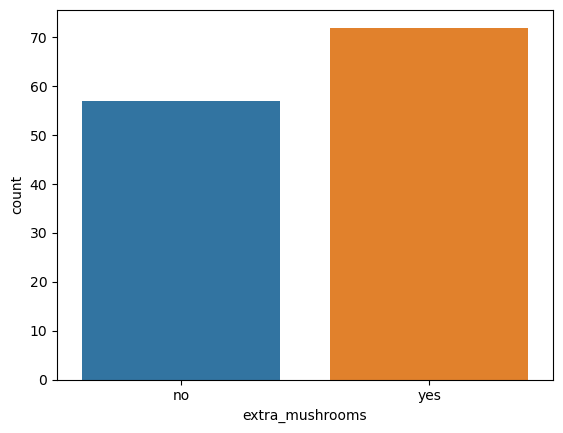

In [62]:
sns.countplot(x='extra_mushrooms',data=data)

# Bivariate Analysis

# Price by Company

In [64]:
data.columns

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

<Axes: xlabel='company', ylabel='price'>

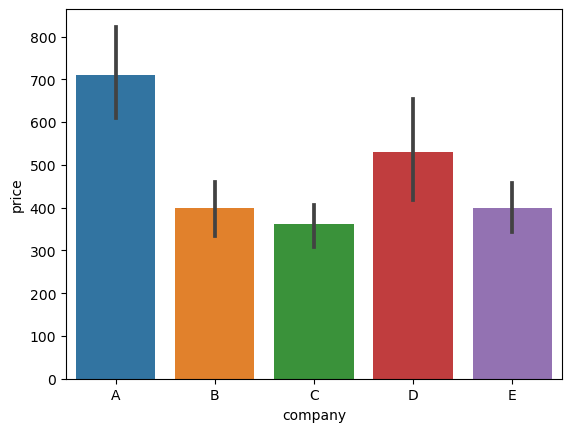

In [70]:
sns.barplot(x='company',y='price',data=data)

# Price by topping

<Axes: xlabel='price', ylabel='topping'>

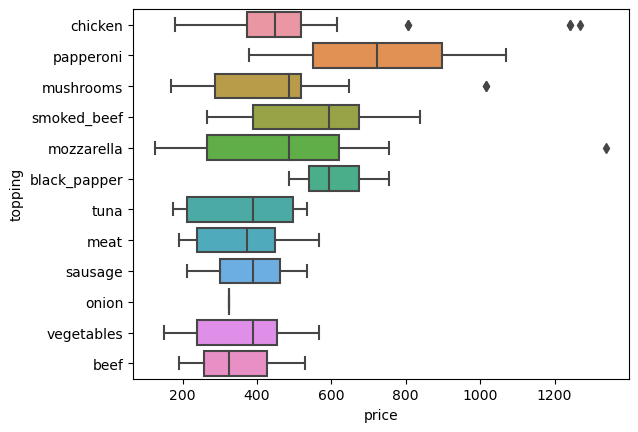

In [72]:
sns.boxplot(x='price',y='topping',data=data)

# Price by Size

<Axes: xlabel='size', ylabel='price'>

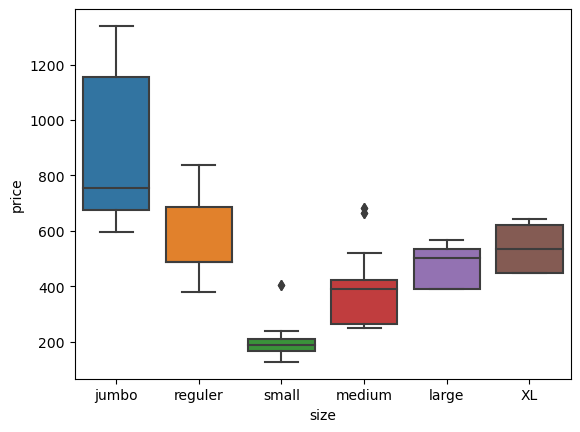

In [74]:
sns.boxplot(y='price',x='size',data=data)

# Find the most Expensive Pizza

In [75]:
data[data['price'].max()==data['price']]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# Find diameter of jumbo size pizzas


In [78]:
data[data['size']=='jumbo']['diameter'].head()

0    22.0
1    20.0
4    18.0
5    18.5
6    16.0
Name: diameter, dtype: float32

# Find diameter of XL size pizzas

In [80]:
data[data['size']=='XL']['diameter'].head()

29    17.0
35    17.0
41    17.0
47    17.0
93    17.0
Name: diameter, dtype: float32

# Let's remove outliers

In [82]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
6,A,594.0,16.0,smoked_beef,american_favorite,jumbo,no,yes,yes
11,A,594.0,16.0,black_papper,super_supreme,jumbo,yes,yes,no
16,A,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,yes
80,D,594.0,16.0,smoked_beef,meat_lovers,jumbo,no,yes,no


In [84]:
data=data.drop(data.index[[6,11,16,80]])

In [85]:
data[(data['size']=='jumbo') & (data['diameter']<=16)]

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms


# 9.Label Encoding

In [89]:
cat_cols=data.select_dtypes(include=['object']).columns

In [90]:
cat_cols

Index(['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese',
       'extra_mushrooms'],
      dtype='object')

In [88]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,1269.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,1069.2,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,648.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,837.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,1339.2,18.0,mozzarella,double_signature,jumbo,yes,no,yes


In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
en=LabelEncoder()
for i in cat_cols:
    data[i]=en.fit_transform(data[i])

In [93]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


# 10.Store Feature Matrix in X and Response(Target) In Vector y

In [94]:
X=data.drop('price',axis=1)
y=data['price']

# 11.Spliting The Dataset into the Training Set And Test Set

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [97]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


# 13.Model Training

In [104]:
lr=LinearRegression()
lr.fit(X_train,y_train)

svm=SVR()
svm.fit(X_train,y_train)

rf=RandomForestRegressor()
rf.fit(X_train,y_train)

gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

xg=XGBRegressor()
xg.fit(X_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

# 14.Prediction on Test data

In [105]:
y_pred1=lr.predict(X_test)
y_pred2=svm.predict(X_test)
y_pred3=rf.predict(X_test)
y_pred4=gbr.predict(X_test)
y_pred5=xg.predict(X_test)

# 15.Evaluating the Algorithm

In [108]:
from sklearn import metrics


In [109]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)
score5 = metrics.r2_score(y_test,y_pred5)

In [110]:
print(score1,score2,score3,score4,score5)

0.6712827779795154 -0.058422678416528706 0.8285687846990908 0.8892482341223493 0.9037532335665138


In [112]:
final_data=pd.DataFrame({'Models':['LR','SVR','RF','GB','XGR'],'R2_Score':[score1,score2,score3,score4,score5]})

<Axes: xlabel='Models', ylabel='R2_Score'>

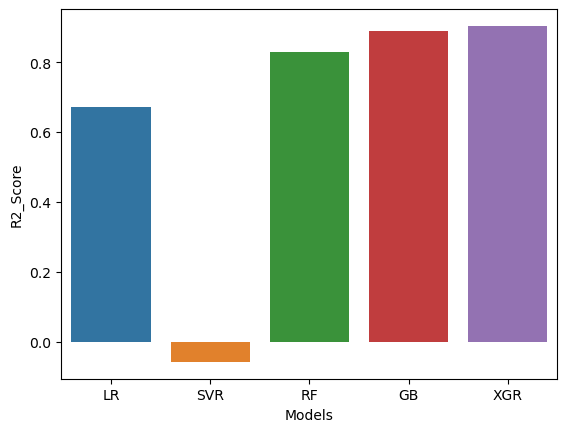

In [114]:
sns.barplot(x='Models',y='R2_Score',data=final_data)

# 16.Feature Importance

# 16.1 Random Forest 

In [117]:
rf.feature_importances_

array([0.02618053, 0.59573578, 0.0325086 , 0.13076917, 0.17507317,
       0.02141961, 0.01310176, 0.00521138])

In [121]:
fea=pd.Series(rf.feature_importances_,index=X_train.columns)

<Axes: >

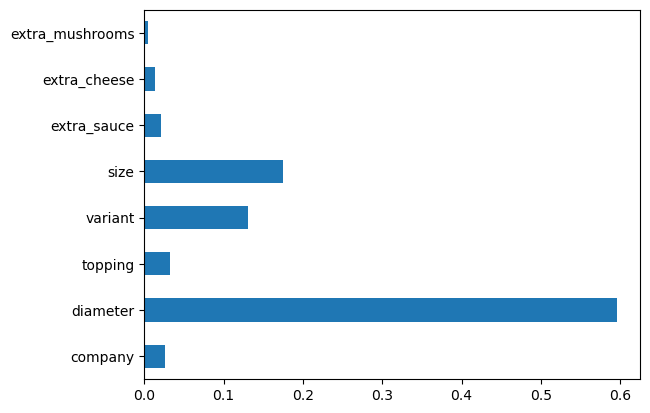

In [123]:
fea.plot(kind='barh')

# 16.2 Gradient Boosting Regressor

In [124]:
gbr.feature_importances_

array([0.00629069, 0.63734224, 0.05249878, 0.10153167, 0.16299466,
       0.03394016, 0.00247834, 0.00292346])

In [125]:
fea=pd.Series(gbr.feature_importances_,index=X_train.columns)

<Axes: >

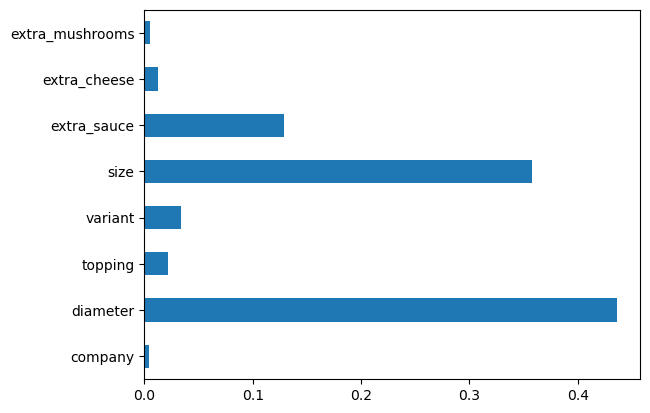

In [129]:
fea.plot(kind='barh')

In [127]:
xg.feature_importances_

array([0.003974  , 0.43592376, 0.02142869, 0.03392151, 0.3578377 ,
       0.12908663, 0.01259   , 0.00523772], dtype=float32)

In [130]:
fea=pd.Series(xg.feature_importances_,index=X_train.columns)


<Axes: >

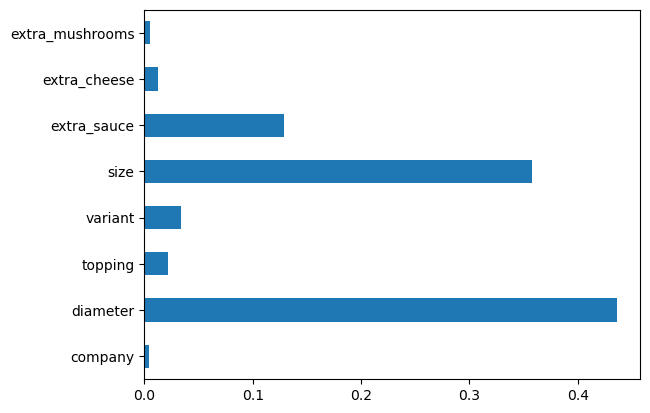

In [132]:
fea.plot(kind='barh')

# 17.Save the Model

In [133]:
X=data.drop('price',axis=1)
y=data['price']

In [134]:
xgb=XGBRegressor()

In [135]:
xgb.fit(X,y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [136]:
import joblib

In [138]:
joblib.dump(xgb,'pizza_price_predict')

['pizza_price_predict']

In [139]:
model=joblib.load('pizza_price_predict')

In [156]:
data.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,1269.0,22.0,2,8,1,1,1,0
1,0,1069.2,20.0,7,8,1,1,1,0
2,0,648.0,16.0,5,8,4,1,1,1
3,0,837.0,14.0,9,8,4,1,0,1
4,0,1339.2,18.0,4,8,1,1,0,1


In [162]:
df=pd.DataFrame({'company':0,
                 'diameter':22.0,
                 'topping':2,
                 'variant':8,
                 'size':1,
                 'extra_sauce':1,
                 'extra_cheese':1,
                 'extra_mushrooms':0},index=[0])

In [163]:
df


,company,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,22.0,2,8,1,1,1,0


In [164]:
model.predict(df)

array([1269.0028], dtype=float32)

# 18.GUI

In [165]:
from tkinter import *
import joblib
import pandas as pd

In [ ]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = float(e8.get())

    model = joblib.load('pizza_price_predict')
    df = pd.DataFrame({
    'company':p1,
    'diameter':p2,
    'topping':p3,
    'variant':p4,
    'size':p5,
    'extra_sauce':p6,
    'extra_cheese':p7,
    'extra_mushrooms':p8
},index=[0])
    result = model.predict(df)
    
    Label(master, text="Pizza Price is").grid(row=31)
    Label(master, text=result).grid(row=32)
    print("Pizza Price Prediction", result)
    
master =Tk()
master.title("Pizza Price Prediction Using Machine Learning")
label = Label(master,text = "Pizza Price Prediction",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Company Name").grid(row=1)
Label(master,text = "Enter Your Diameter of the Pizza").grid(row=2)
Label(master,text = "Topping").grid(row=3)
Label(master,text = "Variant").grid(row=4)
Label(master,text = "Size").grid(row=5)
Label(master,text = "extra_sauce [1:yes,0:No]").grid(row=6)
Label(master,text = "extra_cheese [1:yes,0:No] ").grid(row=7)
Label(master,text = "extra_mushrooms [1:yes,0:No]").grid(row=8)


e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)

e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)

Button(master,text="Predict",command=show_entry).grid()

mainloop()